### ***Diabetes Prediction Project: Introduction***

***This project focuses on using machine learning to predict the risk of diabetes based on health-related data. By analyzing key factors, we aim to develop an accurate model for early detection and intervention. This initiative holds the potential to significantly improve healthcare outcomes and empower individuals to proactively manage their health.***

In [ ]:
#importing all the dependencies
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

### ***data collection and pre processing***

In [ ]:
#importing the data set
data=pd.read_csv("diabetes (1).csv")

In [ ]:
#converting it into pandas dataframe
df=pd.DataFrame(data)

In [ ]:
#printing the head of data frame
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.shape

(768, 9)

In [ ]:
#checking for the null values
df.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
#checking for the duplicated values
df.duplicated().any()

False

In [ ]:
df.count()

Pregnancies                 768
Glucose                     768
BloodPressure               768
SkinThickness               768
Insulin                     768
BMI                         768
DiabetesPedigreeFunction    768
Age                         768
Outcome                     768
dtype: int64

In [ ]:
#renaming for convinience
df.rename(columns={'Outcome':'target'},inplace=True)

In [ ]:
df.value_counts('target')

target
0    500
1    268
dtype: int64

# ***0--> Non Diabetic***
# ***1--> Diabetic***

In [ ]:
df.groupby('target').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
target,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,target
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   target                    768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
X=df.drop(columns='target')

In [ ]:
X.shape

(768, 8)

In [ ]:
y=df['target']

In [ ]:
y.shape

(768,)

### ***performimg standardization***

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(X)


### ***identifying the distributions of the features***

<Axes: >

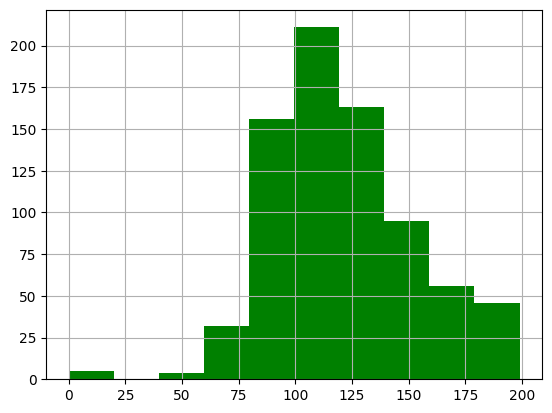

In [ ]:
df['Glucose'].hist(color='g')


<Axes: >

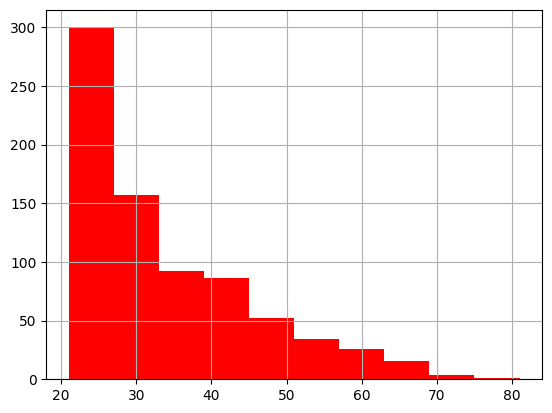

In [ ]:
df['Age'].hist(color='r')

<Axes: >

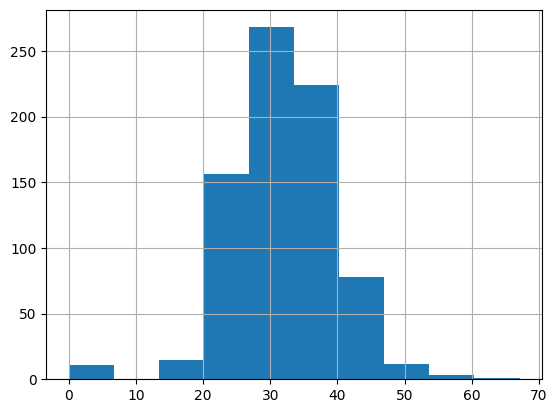

In [ ]:
df['BMI'].hist()

### ***performimg the train_test_split***

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=2)

In [ ]:
X_train.shape

(614, 8)

In [ ]:
X_test.shape


(154, 8)

In [ ]:
y_test.shape


(154,)

In [ ]:
y_train.shape


(614,)

### ***model building***
### ***model--> support vector classifier***

In [ ]:
from sklearn import svm
from sklearn.svm import SVC
classifier=SVC(kernel='linear')
classifier.fit(X_train,y_train)

SVC(kernel='linear')

### ***finding the accuaracy***

In [ ]:
#accuracy of testing data
prediction=classifier.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_of_svc=accuracy_score(y_test,prediction)
accuracy_of_svc*100

77.27272727272727

### ***making  a predictive system***

In [ ]:
input_data= (1,85,66,29,0,26.6,0.351,31)

#changing the input data to numpy array
input_data_array=np.asarray(input_data)

In [ ]:
#reshaping the array
reshaped_input_data=input_data_array.reshape(1,-1)

reshaped_input_data

array([[ 1.   , 85.   , 66.   , 29.   ,  0.   , 26.6  ,  0.351, 31.   ]])

In [ ]:
#standarzize the input data
std_data=scaler.transform(reshaped_input_data)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
std_data

prediction=classifier.predict(std_data)

print(prediction)



if(prediction[0] == 0):
  print("the person is not diabetic")
else:
  print("the person is diabetic")

[0]
the person is not diabetic


### ***performing visualizations***

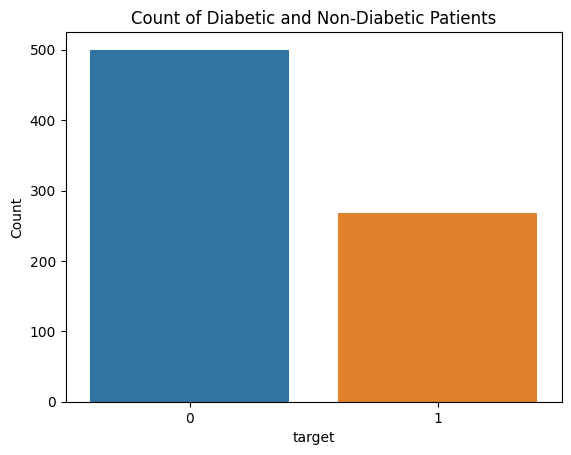

In [ ]:
#count of diabeties and non diabeties
sns.countplot(df, x='target')
plt.xlabel('target')
plt.ylabel('Count')
plt.title('Count of Diabetic and Non-Diabetic Patients')
plt.show()

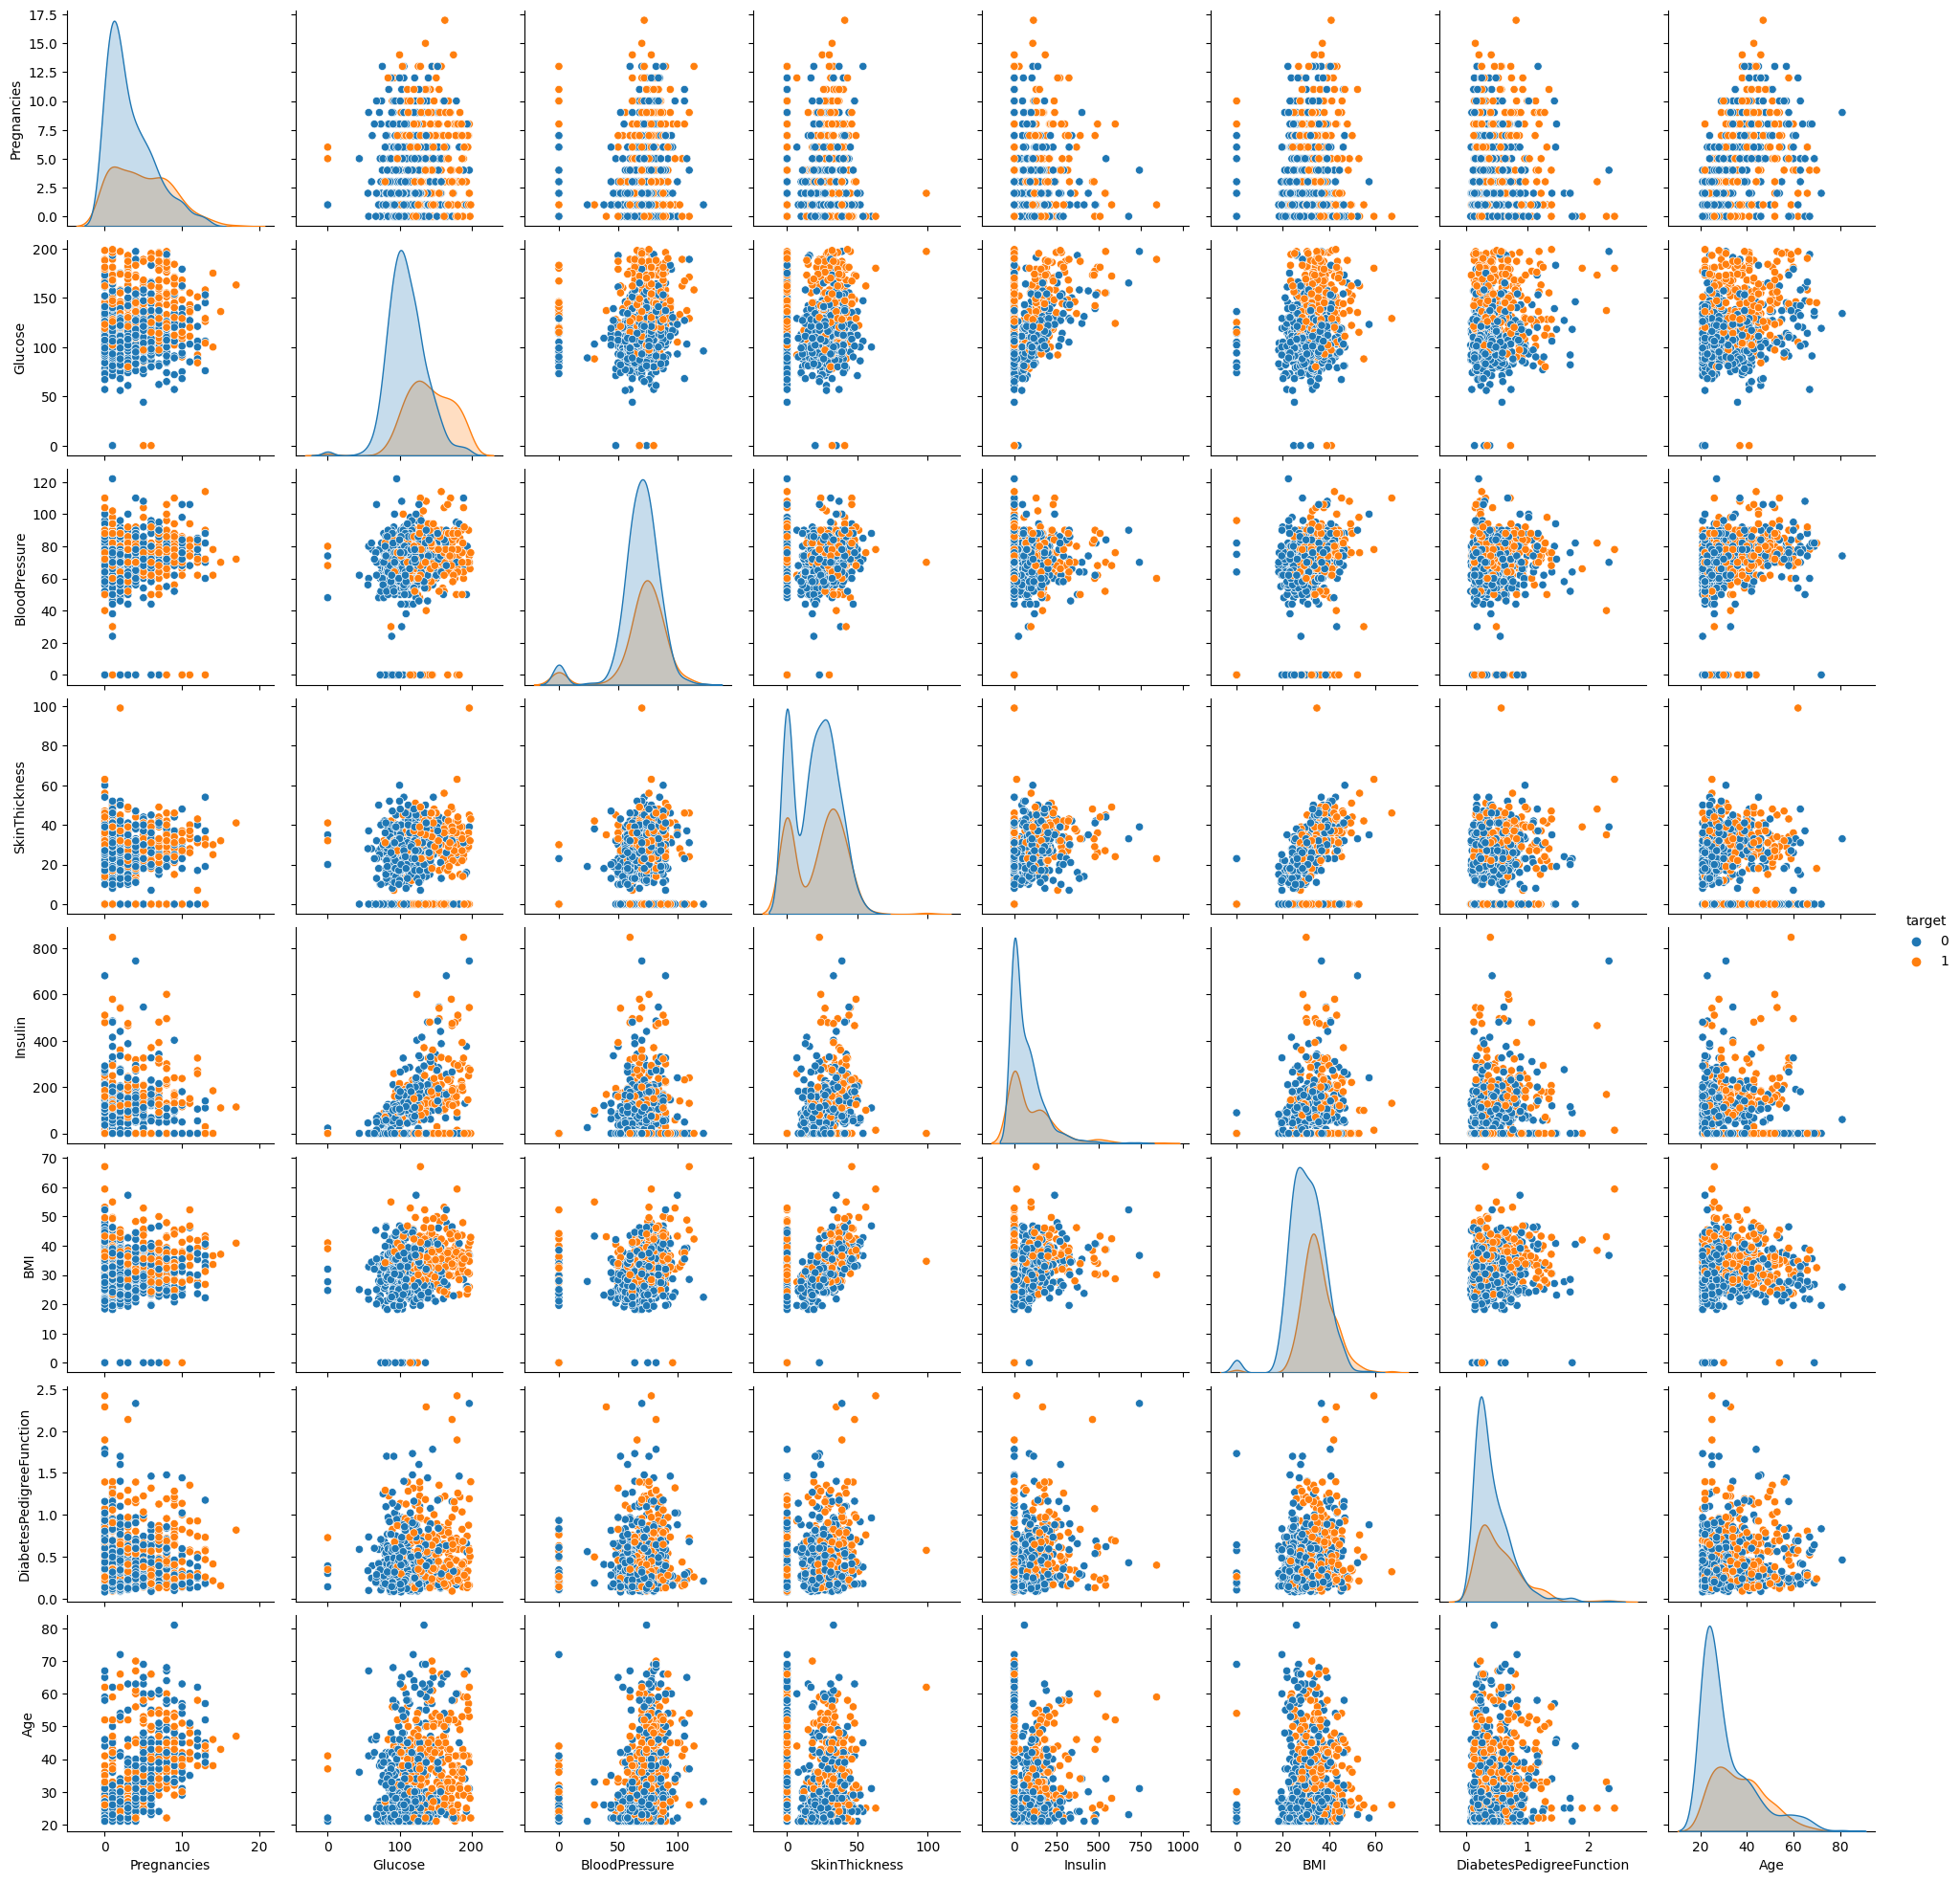

In [ ]:
sns.pairplot(df,hue='target')
plt.show()

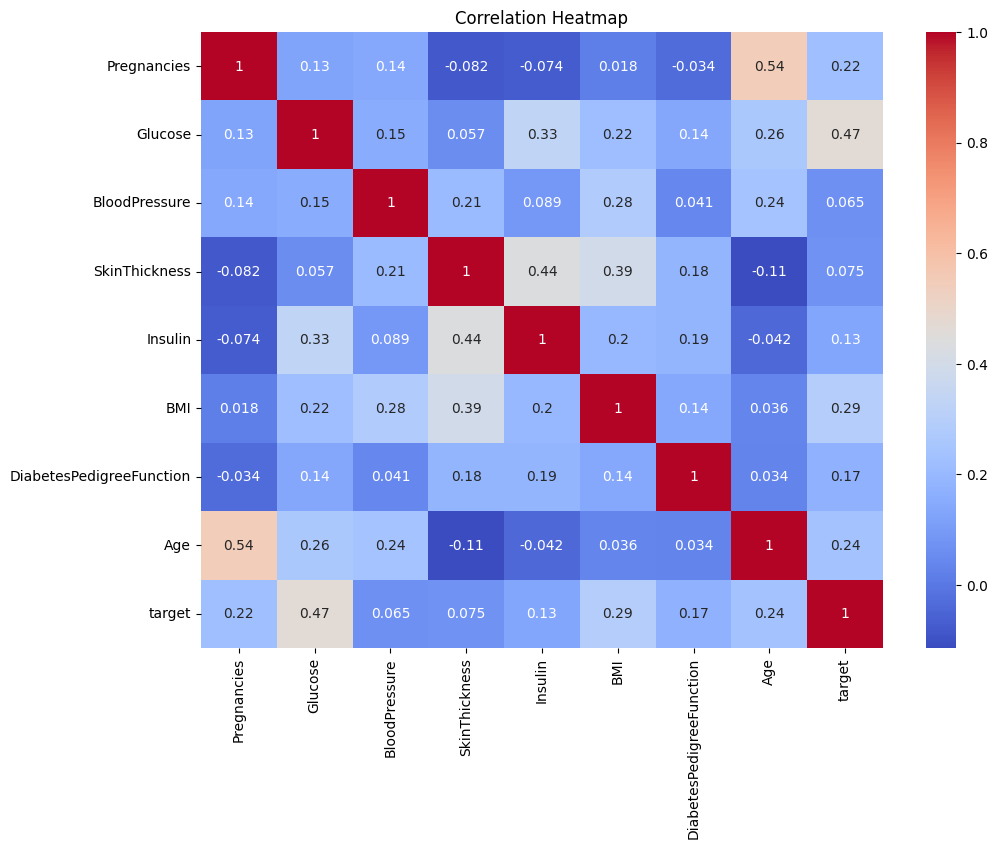

In [ ]:
#correlation heatmap for the data set
plt.figure(figsize=(11, 8))
corr_matrix =df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

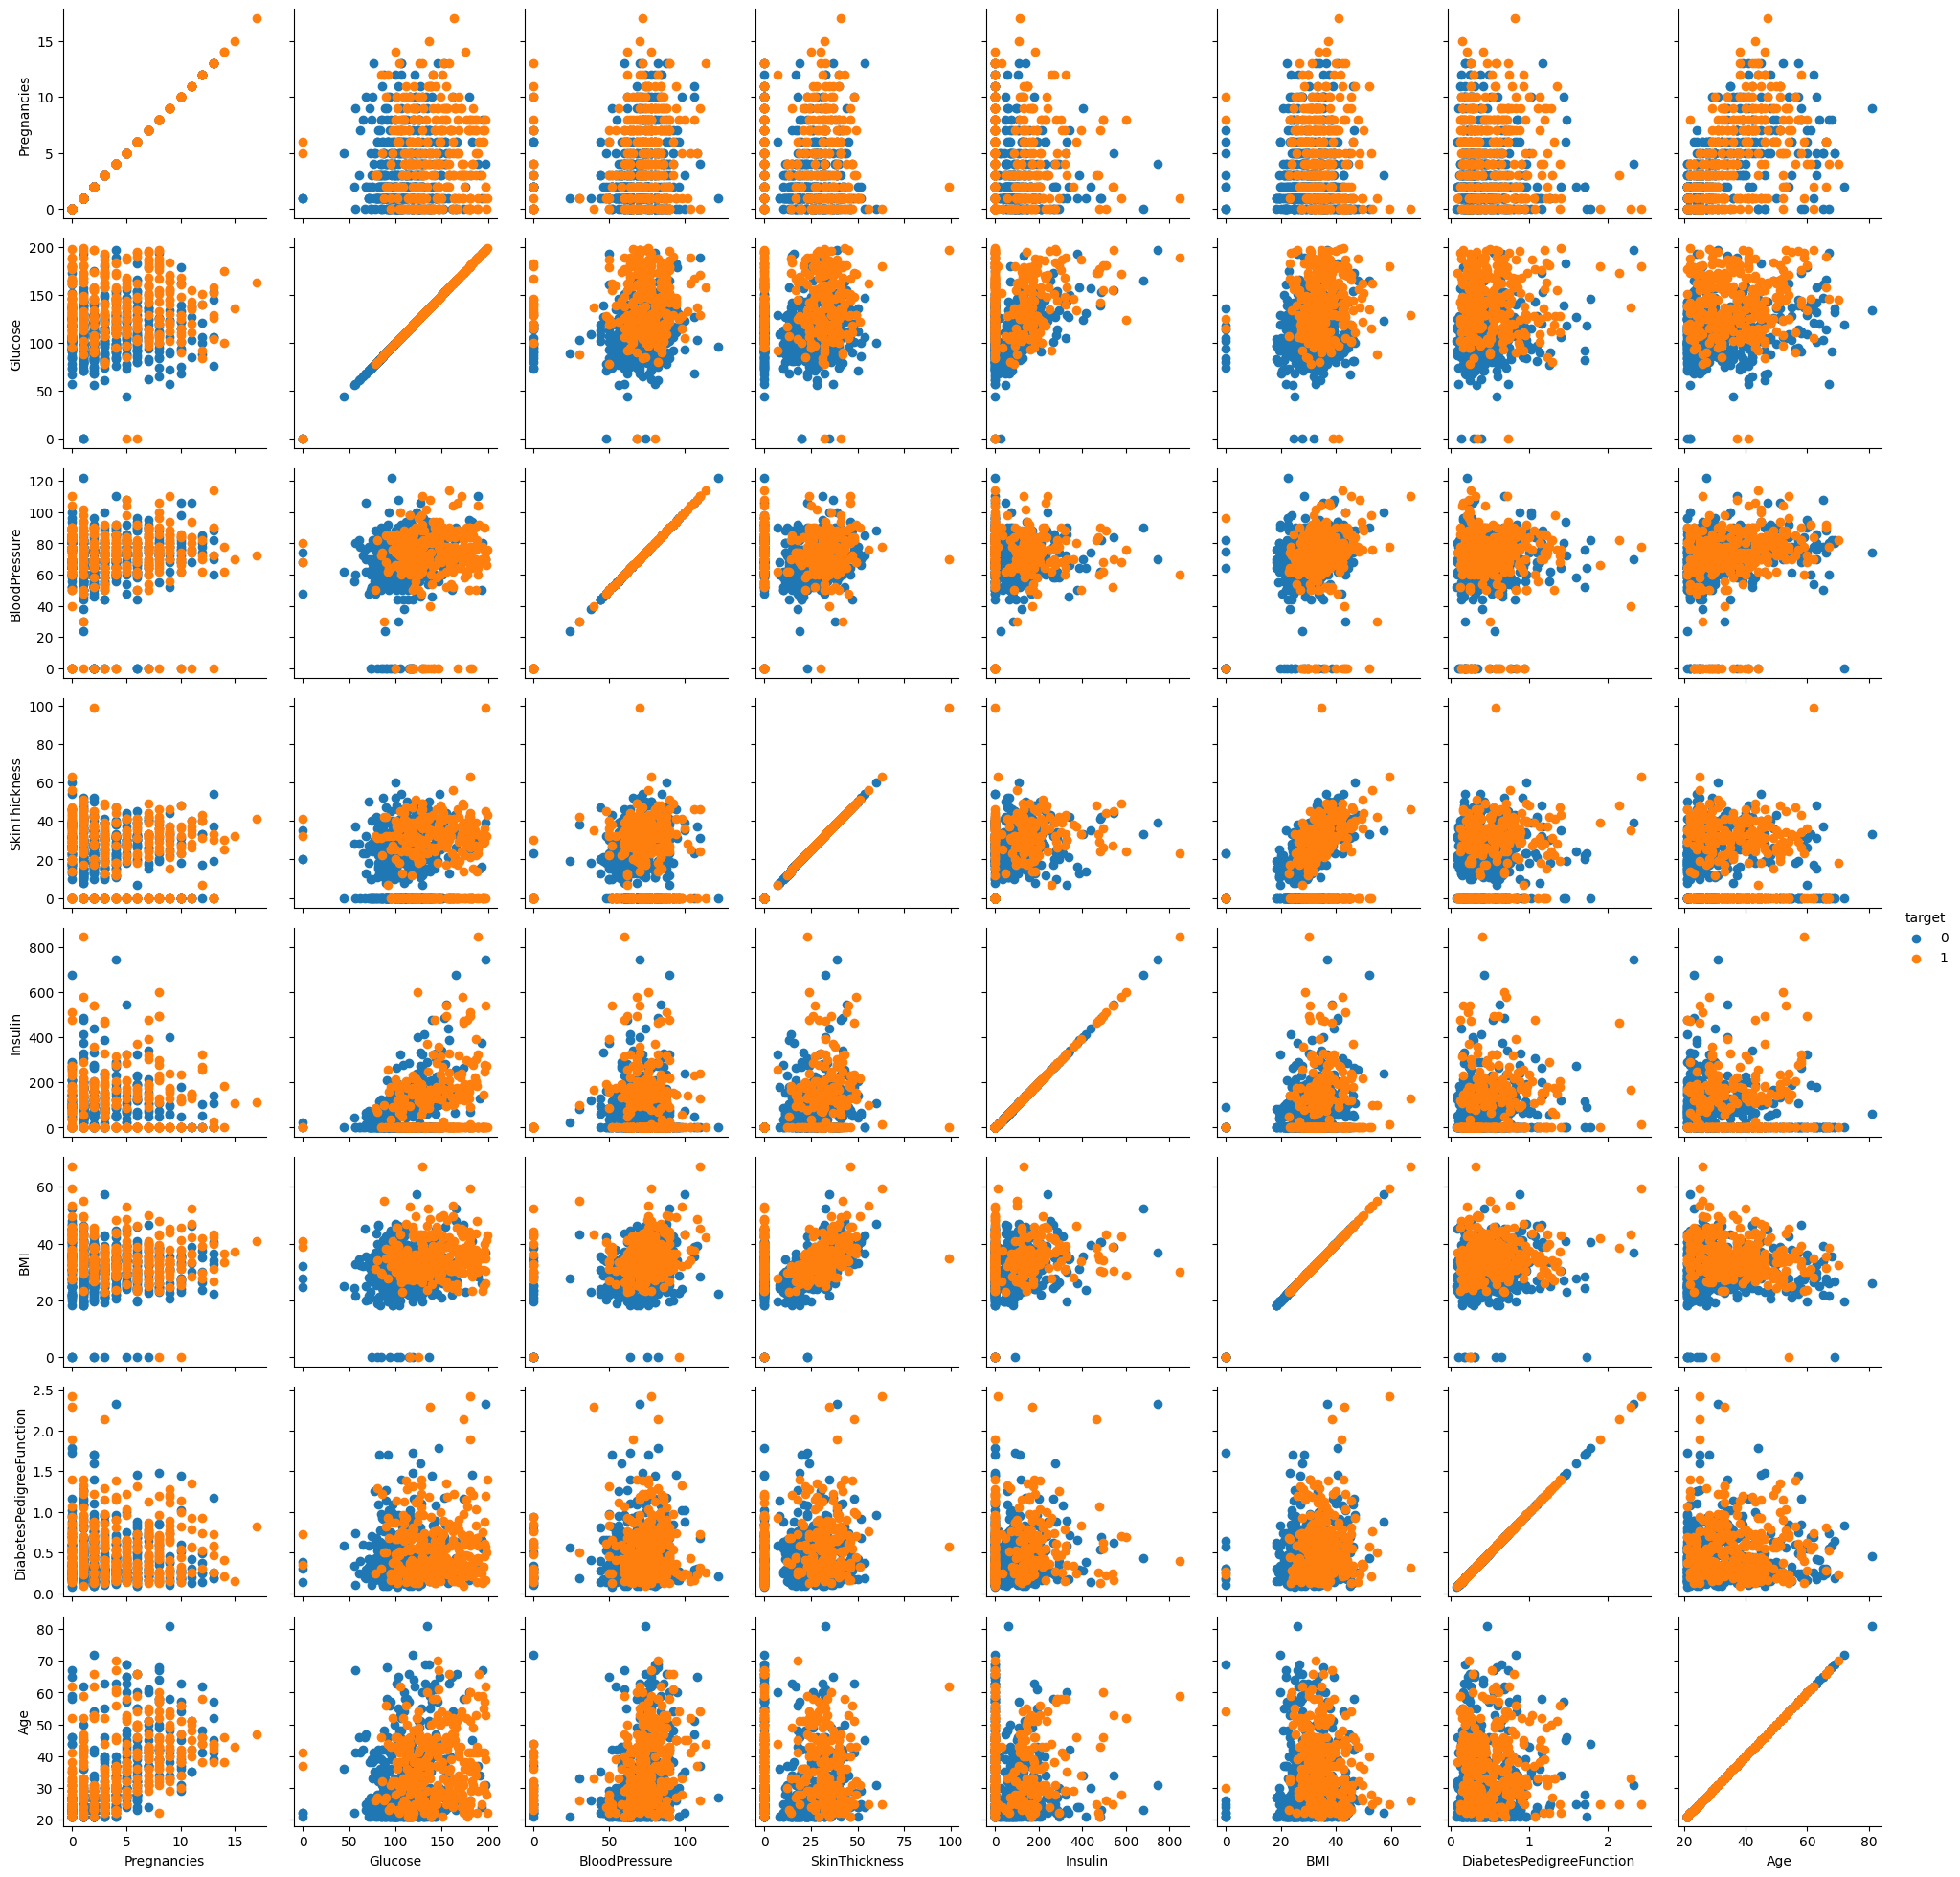

In [141]:
g = sns.PairGrid(df, hue='target')
g.map(plt.scatter)
g.add_legend()
plt.show()

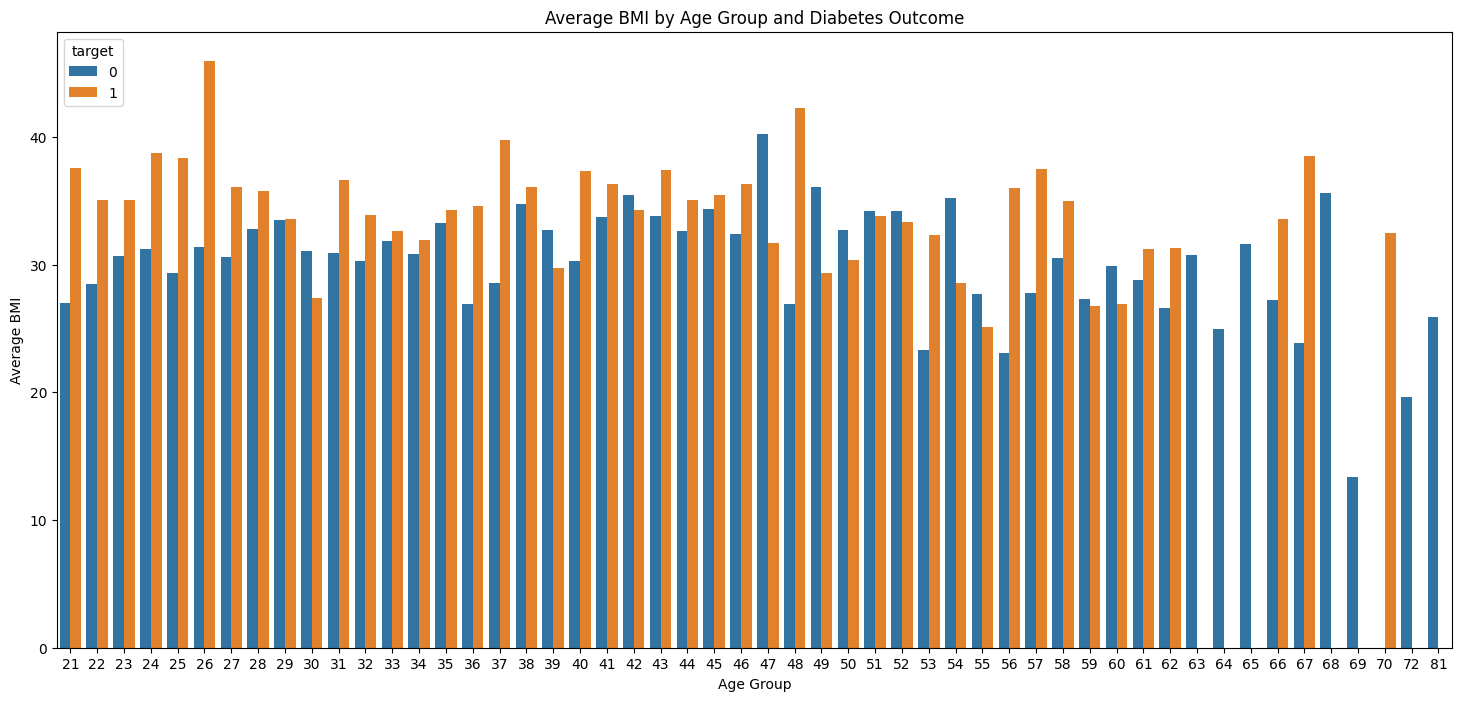

In [140]:
plt.figure(figsize=(18,8))
sns.barplot(data=df, x='Age', y='BMI', hue='target',errorbar=None)
plt.xlabel('Age Group')
plt.ylabel('Average BMI')
plt.title('Average BMI by Age Group and Diabetes Outcome')
plt.show()



### ***Conclusion***

*Our diabetes prediction project has yielded strong results, with a pretty good accuracy in classifying individuals as diabetic or non-diabetic. This suggests the model's potential in aiding early diabetes detection and healthcare resource optimization.*